In [ ]:
# Lab 2: Classification Using KNN and RNN Algorithms
**Name:** Shashwat Baral
**Course:** 2025 Summer - Advanced Big Data and Data Mining (MSCS-634-B01)
**Lab:** Classification with KNN and RNN on Wine Dataset


In [12]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [15]:
# Convert to DataFrame for exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
# Check class distribution
df['target'].value_counts()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [18]:
# Split into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Test different k values
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k} Accuracy: {acc:.4f}")


K=1 Accuracy: 0.7778
K=5 Accuracy: 0.7222
K=11 Accuracy: 0.7500
K=15 Accuracy: 0.7500
K=21 Accuracy: 0.7778


In [20]:
# Normalize data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different radius values
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    rnn.fit(X_train_scaled, y_train)
    y_pred = rnn.predict(X_test_scaled)

    # Filter out any predictions labeled -1 (outliers)
    mask = y_pred != -1
    if np.sum(mask) == 0:
        acc = 0.0
    else:
        acc = accuracy_score(y_test[mask], y_pred[mask])

    rnn_accuracies.append(acc)
    print(f"Radius={radius} Accuracy: {acc:.4f}")


Radius=350 Accuracy: 0.3889
Radius=400 Accuracy: 0.3889
Radius=450 Accuracy: 0.3889
Radius=500 Accuracy: 0.3889
Radius=550 Accuracy: 0.3889
Radius=600 Accuracy: 0.3889


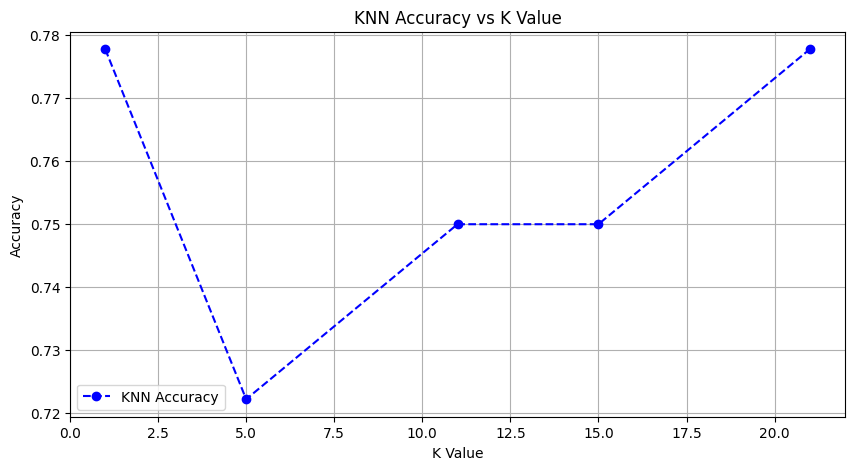

In [22]:
# Plot KNN Accuracy
plt.figure(figsize=(10,5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='--', color='blue', label='KNN Accuracy')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()




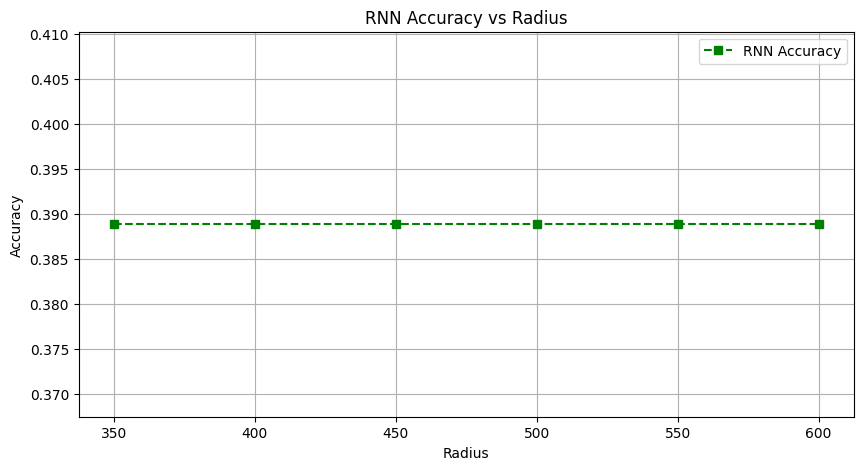

In [23]:
# Plot RNN Accuracy
plt.figure(figsize=(10,5))
plt.plot(radius_values, rnn_accuracies, marker='s', linestyle='--', color='green', label='RNN Accuracy')
plt.title("RNN Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()